# Question 1 

This problem required us to work on the UCI automobile dataset and build a KNN model for it. Let us import the required libraries first which will be helpful for both the problems in the assignment. 

In [4]:
#### Library imports (Numpy, Pandas and Matplotlib)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## Loading the relevant dataset

In [58]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

car_df = pd.read_csv('imports-85.data', names = cols)
print(car_df.shape)
car_df.head()

(205, 26)


symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [59]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [60]:
car_df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

## Cleaning the dataset 

### Picking out Numeric Columns

From the information provided in the `imports-85.data` we can get the numeric columns present in the dataset. Since knn specifically suffers from the curse of dimensionality and hence it would be benificial to start with continous numerical data for performing regression task using KNN algorithm

In [61]:
### Prototype 1 with only numeric columns

numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 
                'price'
               ]

numeric_df = car_df[numeric_cols]
numeric_df.head()

normalized-losses  wheel-base  length  width  curb-weight  bore stroke  \
0                 ?        88.6   168.8   64.1         2548  3.47   2.68   
1                 ?        88.6   168.8   64.1         2548  3.47   2.68   
2                 ?        94.5   171.2   65.5         2823  2.68   3.47   
3               164        99.8   176.6   66.2         2337  3.19   3.40   
4               164        99.4   176.6   66.4         2824  3.19   3.40   

   compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0                9.0        111     5000        21           27  13495  
1                9.0        111     5000        21           27  16500  
2                9.0        154     5000        19           26  16500  
3               10.0        102     5500        24           30  13950  
4                8.0        115     5500        18           22  17450

In [62]:
### Checking for null values

numeric_df.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [63]:
numeric_df.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
curb-weight            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Although there were no NaN values in the initial dataset but there are some missing values denoted by '?' which needs to be handled before moving forward. This can be achieved by first replacing all the '?' with NaN and now coverting all of the columns to continous float values. 

In [100]:
numeric_df.apply(lambda x : x == '?', axis = 1).sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [64]:
filled_df = numeric_df.replace('?', np.nan)
filled_df.head()

normalized-losses  wheel-base  length  width  curb-weight  bore stroke  \
0               NaN        88.6   168.8   64.1         2548  3.47   2.68   
1               NaN        88.6   168.8   64.1         2548  3.47   2.68   
2               NaN        94.5   171.2   65.5         2823  2.68   3.47   
3               164        99.8   176.6   66.2         2337  3.19   3.40   
4               164        99.4   176.6   66.4         2824  3.19   3.40   

   compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0                9.0        111     5000        21           27  13495  
1                9.0        111     5000        21           27  16500  
2                9.0        154     5000        19           26  16500  
3               10.0        102     5500        24           30  13950  
4                8.0        115     5500        18           22  17450

In [65]:
### Converting objects to numeric values

conv_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
filled_df[conv_cols] = filled_df[conv_cols].astype(float)
filled_df.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
curb-weight            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Since the count of '?' were around 55-60 and total rows are around 200, we can't remove all rows containing '?'. So, I only removed the rows containing more than two missing values and filled the remaining ones with the mean of that particular column.

In [66]:
filled_df = filled_df.dropna(axis = 0, thresh = 2)
filled_df = filled_df.fillna(filled_df.mean())
filled_df.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalizing the data

We can see from the `car_df.describe()` cell above that the columns are fairly variant across different ranges and this could possibly lead to increasing the rmse error as it will become prone to outliers in the dataset. 

In [67]:
normalized_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'
               ]

new_df = filled_df[normalized_cols]
new_df = (new_df - new_df.min()) / (new_df.max() - new_df.min())

new_df['price'] = filled_df['price']
new_df.head()

normalized-losses  wheel-base    length     width  curb-weight      bore  \
0           0.298429    0.058309  0.413433  0.316667     0.411171  0.664286   
1           0.298429    0.058309  0.413433  0.316667     0.411171  0.664286   
2           0.298429    0.230321  0.449254  0.433333     0.517843  0.100000   
3           0.518325    0.384840  0.529851  0.491667     0.329325  0.464286   
4           0.518325    0.373178  0.529851  0.508333     0.518231  0.464286   

     stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0  0.290476             0.1250    0.262500  0.346939  0.222222     0.289474   
1  0.290476             0.1250    0.262500  0.346939  0.222222     0.289474   
2  0.666667             0.1250    0.441667  0.346939  0.166667     0.263158   
3  0.633333             0.1875    0.225000  0.551020  0.305556     0.368421   
4  0.633333             0.0625    0.279167  0.551020  0.138889     0.157895   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0

## Implementing our custom KNN class and KNN Regressor

In [80]:
class myKNN:
    
    def __init__(self, train, price, n_neighbors):
        self.k = n_neighbors
        self.train = train
        self.price = price
     
    def euclidean_distance(self, a, b):
        return np.linalg.norm(a-b)
    
    def genKneighbors(self, X_test):
        
        train = self.train
        k = self.k
        
        ## Array to store the distances from train set
        distances = list()
        
        for ind, row in enumerate(train):
            dist = self.euclidean_distance(row, X_test)
            distances.append((ind, dist))
            
        ## Sorting and finding the k nearest neighbors
        neighbors = sorted(distances, key = lambda x : x[1])[:k]
        indices, dists = list(list(zip(*neighbors))[0]), list(list(zip(*neighbors))[1])
        
        return np.array(indices), np.array(dists)
    
    def predict(self, test):
        predictions = list()
        
        ## Iterating over each data point present in the test dataset
        for row in test:
            neighbors, distances = self.genKneighbors(row)
            prediction = 0
            
            ## Using the values of the k nearest neighbors for regression
            for ind, i in enumerate(neighbors):
                prediction += self.price[i]
                
            ## Taking mean of all the values of neighbors
            prediction = prediction/self.k
            predictions.append(prediction)
        
        return predictions
        
def mean_squared_err(y_true, y_pred):
    return np.square(np.subtract(y_true,y_pred)).mean()
        

## Custom function for implementing regression
def knn_regressor(df, k, features, prices):
    
    np.random.seed(1)
    
    ## Shuffling the train dataset randomly
    df_cpy = df.copy(deep = True)
    indices = np.random.permutation(df_cpy.index)
    shuffled_df = df_cpy.reindex(indices)
    
    ## Splitting into train and validation sets (70:30)
    train = shuffled_df.iloc[0:int(len(shuffled_df)*0.70)]
    validation = shuffled_df.iloc[int(len(shuffled_df)*0.70):]
   
    knn = myKNN(train[features].values, train[prices].values, k)
    
    prediction = knn.predict(validation[features].values)
    
    ## Calculation of rmse
    err = np.sqrt(mean_squared_err(validation[prices].values, prediction))
    
    return err

## Part 1(a) 

I am using the custom KNN model deployed above for the dataset and choosing the optimal `k` for which the RMSE error is least.

In [66]:
k_values = range(1, 16)

## Iterating over the values of hyperparameter k
for k in k_values:
    err = knn_regressor(new_df, k, normalized_cols, 'price')
    print ("Validation set accuracy for k = %d: %f" %(k, err))

Validation set accuracy for k = 1: 3991.131874
Validation set accuracy for k = 2: 4076.960118
Validation set accuracy for k = 3: 3923.377247
Validation set accuracy for k = 4: 4078.391297
Validation set accuracy for k = 5: 4362.148120
Validation set accuracy for k = 6: 4262.294977
Validation set accuracy for k = 7: 4495.397140
Validation set accuracy for k = 8: 4593.628761
Validation set accuracy for k = 9: 4639.131977
Validation set accuracy for k = 10: 4586.204216
Validation set accuracy for k = 11: 4579.738260
Validation set accuracy for k = 12: 4558.082684
Validation set accuracy for k = 13: 4621.953855
Validation set accuracy for k = 14: 4656.893633
Validation set accuracy for k = 15: 4730.914015


We ended up getting the least error for k = 3 which is close to 4k. 

## Part 1(b)

I have written my custom code which performs the k-fold cross validation. It splits the original dataset into k parts and then chooses one of the folds to be test set and rest to be the train set. 

In [101]:
## Custom function that performs the split 
def cvSplit(df, folds):
    
    np.random.seed(1)
    
    ## Array that stores the split
    split = list()
    df_cpy = df.copy(deep = True)
    sz = int(df_cpy.shape[0]/folds)
    
    for i in range(folds):
        fold = list()
        while len(fold) < sz:
            ## Generating random rows of dataset (Shuffling)
            idx = np.random.randint(df_cpy.shape[0])
            idx = df_cpy.index[idx]
            fold.append(df_cpy.loc[idx].values.tolist())
            df_cpy.drop(idx, inplace = True)
            
        split.append(np.array(fold))
            
    return np.array(split)

## Custom function that runs the k-fold CV for each fold separately
def knnCV(df, k):
    df_cpy = df.copy(deep = True)
    data = cvSplit(df_cpy, 10)
    feature_sz = len(df_cpy.columns)
    scores = list() ## Array to store the CV RMSE
        
    for idx, fold in enumerate(data):
        x = np.array(list(data))
        train = list()
        
        ## Assigning the rest of the data except the current fold as train
        for i, row in enumerate(x):
            if i == idx:
                continue
            train.append(np.reshape(row, (-1, feature_sz)))
        
        ## Assigning the current fold to be test
        test = list()
        for row in fold:
            test.append(row)
            
        train = np.reshape(train, (-1, feature_sz))
                    
        train_prices = np.array([row[-1] for row in train])
        train_features = np.array([row[:-1] for row in train])
        
        test_prices = np.array([row[-1] for row in test])
        test_features = np.array([row[:-1] for row in test])
        
        knn = myKNN(train_features, train_prices, k)
        
        predictions = knn.predict(test_features)
        
        err = np.sqrt(mean_squared_err(test_prices, predictions))
        scores.append(err)
        
    ## Finally returning the average score over all the k-folds
    return sum(scores)/float(len(scores))

Running the 10-fold CV for all the k in the range (1-15)

In [60]:
features = normalized_cols.copy()
features.append('price')

for k in k_values:
    new_df_cpy = new_df[features].copy()
    err = knnCV(new_df_cpy, k)
    print("10-fold CrossValidation set accuracy for k = %d: %f" %(k, err))

10-fold CrossValidation set accuracy for k = 1: 3278.211758
10-fold CrossValidation set accuracy for k = 2: 3309.658881
10-fold CrossValidation set accuracy for k = 3: 3711.239409
10-fold CrossValidation set accuracy for k = 4: 3746.047081
10-fold CrossValidation set accuracy for k = 5: 3794.914918
10-fold CrossValidation set accuracy for k = 6: 3869.409272
10-fold CrossValidation set accuracy for k = 7: 4039.549415
10-fold CrossValidation set accuracy for k = 8: 4146.534335
10-fold CrossValidation set accuracy for k = 9: 4217.372720
10-fold CrossValidation set accuracy for k = 10: 4271.350188
10-fold CrossValidation set accuracy for k = 11: 4328.238737
10-fold CrossValidation set accuracy for k = 12: 4380.916902
10-fold CrossValidation set accuracy for k = 13: 4324.905820
10-fold CrossValidation set accuracy for k = 14: 4367.880641
10-fold CrossValidation set accuracy for k = 15: 4373.748495


For the 13-feature case we get the best overall RMSE estimate with k = 1.

In [61]:
new_df.head()

normalized-losses  wheel-base    length     width  curb-weight      bore  \
0           0.298429    0.058309  0.413433  0.316667     0.411171  0.664286   
1           0.298429    0.058309  0.413433  0.316667     0.411171  0.664286   
2           0.298429    0.230321  0.449254  0.433333     0.517843  0.100000   
3           0.518325    0.384840  0.529851  0.491667     0.329325  0.464286   
4           0.518325    0.373178  0.529851  0.508333     0.518231  0.464286   

     stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0  0.290476             0.1250    0.262500  0.346939  0.222222     0.289474   
1  0.290476             0.1250    0.262500  0.346939  0.222222     0.289474   
2  0.666667             0.1250    0.441667  0.346939  0.166667     0.263158   
3  0.633333             0.1875    0.225000  0.551020  0.305556     0.368421   
4  0.633333             0.0625    0.279167  0.551020  0.138889     0.157895   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0

In [102]:
####################################### Greedy strategy  ##################################
values = [1,3,5,7]

rmse_onefeat = {}

## Iterating over each feature one by one and finding their RMSEs
for feature in normalized_cols:
    temp = []
    for k in values:
        temp.append(knn_regressor(new_df, k, feature, 'price'))
        
    rmse_onefeat[feature] = temp
    
rmse_univariate

{'bore': [7429.3151429937225,
  7059.851289481076,
  7194.867094545753,
  6820.016633666801],
 'city-mpg': [6050.116647946346,
  4652.780213692333,
  4477.335804832327,
  4440.421958864937],
 'compression-ratio': [8656.831816672755,
  7255.974155402882,
  7168.3213028891405,
  7483.869450175801],
 'curb-weight': [6537.31497720779,
  4841.289735187937,
  4253.9925550867565,
  4106.750926544183],
 'highway-mpg': [4986.803211855304,
  4280.660891290603,
  4032.3678732213066,
  3948.4777693319693],
 'horsepower': [5917.896214679985,
  5097.063132283943,
  5045.554598269863,
  5094.011701194762],
 'length': [4432.556563777835,
  4404.396573620502,
  4870.486811118799,
  5391.31160196855],
 'normalized-losses': [7312.141329010031,
  6925.515542998277,
  6836.955572520267,
  7070.403022799313],
 'peak-rpm': [10229.430992969923,
  8060.187099959566,
  8725.098677438742,
  9010.386627082022],
 'stroke': [8614.546710247569,
  7099.2357563077985,
  6760.529130902088,
  7332.5206744486095],
 'whee

In [68]:
## Taking the average over errors of various Ks and finding the good features
avg_rmse_onefeat = {}

for key, values in rmse_onefeat.items():
    avg_rmse[key] = np.mean(values)

avg_rmse_onefeat = pd.Series(avg_rmse)
avg_rmse_onefeat.sort_values()

highway-mpg          4312.077436
length               4774.687888
city-mpg             4905.163656
curb-weight          4934.837049
horsepower           5288.631412
width                5374.395089
wheel-base           5768.674377
normalized-losses    7036.253867
bore                 7126.012540
stroke               7451.708068
compression-ratio    7641.249181
peak-rpm             9006.275849
dtype: float64

We obtained the top features as shown above. We will consider the subsets of the top 6 (13/2) features from the above list as well as the feature list will all the features to show how good these features will generalise

In [82]:
top_models = {
        'top_2': ['highway-mpg', 'length'],
        'top_3': ['highway-mpg', 'length', 'city-mpg'],
        'top_4': ['highway-mpg', 'length', 'city-mpg', 'curb-weight'],
        'top_5': ['highway-mpg', 'length', 'city-mpg', 'curb-weight', 'horsepower'],
        'top_6': ['highway-mpg', 'length', 'city-mpg', 'curb-weight', 'horsepower', 'width'],
        'all' : normalized_cols
} 

k_values = list(range(1, 16))
rmse_over_k = {}

## Calculating the K-fold RMSE error for each of the feature set
for key, value in top_models.items():
    value.append(target_column)
    temp = []
    for k in k_values:
        temp.append(knnCV(new_df[value], k))
        
    rmse_over_k[key] = temp
    
print(rmse_over_k)

{'top_2': [3473.9187785673034, 3385.217753437202, 3389.0908108348767, 3694.4684930613084, 4050.583469948705, 4077.0422478552487, 4098.344912261155, 4105.341109797716, 4218.4541789934365, 4288.582432669675, 4280.582487388119, 4371.163578336067, 4470.21935686705, 4547.971437092998, 4638.210794185843], 'top_3': [3609.5547197748056, 3369.2867493934514, 3519.806450496829, 3775.954049588865, 4020.0476749880886, 4114.699489842313, 4105.508249083637, 4070.9292548156036, 4087.2800697664984, 4176.282444017967, 4228.662492697394, 4308.635433726689, 4394.021063249153, 4436.957753656037, 4513.195299294357], 'top_4': [3476.449275494204, 3292.8947134284376, 3193.368301045888, 3311.801427011098, 3634.724465936368, 3745.7178652113553, 3810.951320355153, 3954.5942626318188, 4038.6135024597847, 4063.0644336735763, 4107.785281340277, 4142.767763614298, 4149.031960994694, 4191.939150036848, 4218.29552154993], 'top_5': [3292.8058199614293, 3072.5043668147914, 3317.7391910871947, 3492.4120231920087, 3656.648

{'top_2': [3385.217753437202, 2], 'top_3': [3369.2867493934514, 2], 'top_4': [3193.368301045888, 3], 'top_5': [3072.5043668147914, 2], 'top_6': [3054.4766095603172, 3], 'all': [3278.211758163035, 1]}


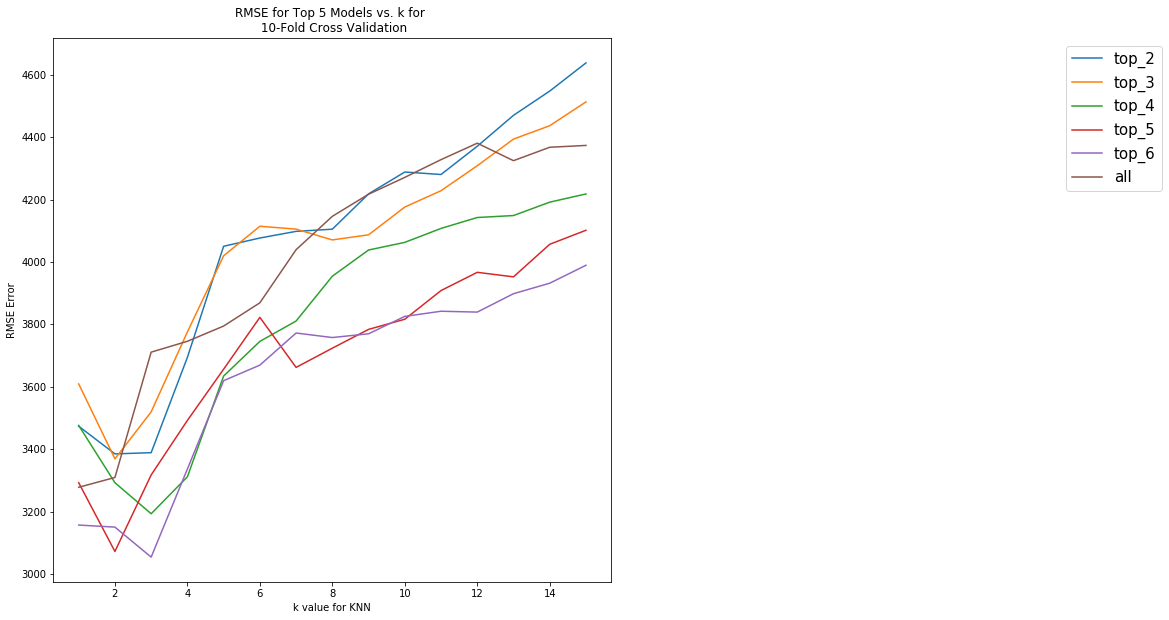

In [91]:
# Returns a dict with the min value of every key's list and its index the list
def find_min_key(rmse_dict):
    minn = {}
    for k, v in rmse_dict.items():
        minn[k] = [min(v), v.index(min(v)) + 1]
        
    return minn

best_k = find_min_key(rmse_over_k)
print(best_k)

# Plot results
fig, ax = plt.subplots(1, figsize = (10, 10))

for key, values in rmse_over_k.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value for KNN')
    ax.set_ylabel('RMSE Error')
    ax.set_title('RMSE for Top 5 Models vs. k for \n 10-Fold Cross Validation')
    ax.legend(bbox_to_anchor=(2, 1), prop={'size': 15})

As can be seen from the above graph, the best results are obtained with choosing the `top_6` feature set (3054.47, k = 3). It can also be seen that taking all the features doesn't generalise well since KNN doesn't really work that well in higher dimensional spaces. 

## Part 1(c) and 1(d)

This part of the problem aims to introduce L0 regularisation in the problem. Since L0 regularisation is a way of penalising the bad features by reducing their weights to zero. Hence, L0 regularisation can be thought of as removing the worst feature from the current set of features. An algorithm for applying L0 regularisation can be to remove the features greedily. At each point iterate over all the features and remove the feature which decreases the error the least. This is much the same as backward search. Another algorithm can be to construct the best feature set while adding the features which have minimum error, constructively. And another can be to find the best features and then use subsets of these to construct new feature sets. This can be called a forward search. We will perform these two ways to implement L0 regularisation. Source for the theory can be found [here](https://www.cs.ubc.ca/~schmidtm/Courses/340-F15/L16.pdf). Though, I have implemented all of the ideas, the idea of forward search is employed in a little more depth since knn suffers from the curse of dimensionality and hence backward search may not be that generalisable at every stage.

In [87]:
######################################## Backward Search ####################################

def rmse_reg_loss(a, b, l, n):
    return np.sqrt(mean_squared_err(a, b)) + l*n

features = normalized_cols.copy()
num_iters = len(features)

while(num_iters > 1):
    num_iters -= 1
    maxx = float('inf')
    max_feature = ""
    
    for feature in features:
        new_features = features.copy()
        new_features.pop(new_features.index(feature))
        err = knn_regressor(new_df, 3, new_features, 'price')
        if err < maxx:
            maxx = err
            max_feature = feature
            
    features.pop(features.index(max_feature))
    print(features)
    err = knn_regressor(new_df, 3, features, 'price')
    print(err)

['normalized-losses', 'wheel-base', 'length', 'width', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg']
3589.8925720672546
['normalized-losses', 'wheel-base', 'length', 'width', 'curb-weight', 'bore', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg']
3029.2488112112424
['normalized-losses', 'wheel-base', 'length', 'width', 'curb-weight', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg']
2831.620796305981
['normalized-losses', 'length', 'width', 'curb-weight', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg']
3065.9245079420325
['length', 'width', 'curb-weight', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg']
2577.8044345818466
['length', 'width', 'curb-weight', 'peak-rpm', 'city-mpg', 'highway-mpg']
2462.2064105905615
['length', 'curb-weight', 'peak-rpm', 'city-mpg', 'highway-mpg']
2531.9663022559075
['length', 'curb-weight', 'peak-rpm', 'city-mpg']
2887.022641743607
['curb-weight', 'peak-rpm', 'city-

In [102]:
################################## Forward Search #####################################

k_vals = [1,2,3,4,5,6,7]

for k in k_vals:
    print(k)
    features = normalized_cols.copy()
    num_iters = len(features)
    done = 0
    obt = []
    min_err = float('inf')
    best = []
    while(done != num_iters):
        done += 1
        maxx = float('inf')
        max_feature = ""

        for feature in features:
            new_features = obt.copy()
            new_features.append(feature)
            err = knn_regressor(new_df, k, new_features, 'price')
            if err < maxx:
                maxx = err
                max_feature = feature

        features.pop(features.index(max_feature))
        obt.append(max_feature)
        err = knn_regressor(new_df, k, obt, 'price')
        if err < min_err:
            min_err = err
            best = obt.copy()
        
    print(best)
    print(min_err)
    print ("##############################################")

1
['length', 'curb-weight', 'bore']
2931.10940771638
##############################################
2
['highway-mpg', 'peak-rpm', 'compression-ratio', 'curb-weight', 'bore']
2403.7957630296432
##############################################
3
['highway-mpg', 'peak-rpm', 'curb-weight', 'stroke', 'compression-ratio']
2463.255341082316
##############################################
4
['highway-mpg', 'curb-weight', 'compression-ratio', 'peak-rpm', 'stroke']
2757.4179048740557
##############################################
5
['highway-mpg', 'curb-weight', 'compression-ratio', 'peak-rpm']
3102.8086638638792
##############################################
6
['highway-mpg', 'curb-weight', 'bore', 'compression-ratio', 'peak-rpm']
3098.713206668908
##############################################
7
['highway-mpg', 'curb-weight', 'compression-ratio']
3256.2178139719204
##############################################


## Results 

The best results obtained are -> rmse error = 2.403k, for k = 2 and feature set as described below. For KNN, the validation set loss gives us confidence on the results and better generalizations (compared to the previous ~3k loss using greedy approach).

The best features obtained are -> {'highway-mpg', 'peak-rpm', 'compression-ratio', 'curb-weight', 'bore'} and all of these are one of the most important factors that one can use for estimating the price. Features like 'highway-mpg' and 'compression-ratio' dictate the fuel-consumption rate, 'peak-rpm' and 'bore' are important measures for predicting how powerful the car is and finally 'curb-weight' can be an important feature dictating the safety provided by the vehicle, all of these features are indeed important for determining the price of the vehicle in real-world as well. 

The set obtained through Greedy was also a fair representation but it had some redundancies like 'highway-mpg' and 'city-mpg' both might not be required and 'length' and 'width' along with 'curb-weight' also might not be that important. We can see that choosing just the best features is not that good as it introduces redundancies and hence a simple combination is not always the best. However, forward search improved the accuracy a lot as it considers the best possible "combinations" of the features available.

# Question 2

In this problem we were asked to work on UCI's Income Dataset and we had to train a Decision Tree classifier for classifying the income to be >50k or <= 50k. Let's first load the dataset.

In [80]:
####################################### Problem 2 ################################################

cols = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
        'marital-status', 'occupation', 'relationship',
        'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
        'native-country', 'income'
       ]
df = pd.read_csv('adult.data', names = cols)
df.head(20)

age          workclass  fnlwgt      education  educational-num  \
0    39          State-gov   77516      Bachelors               13   
1    50   Self-emp-not-inc   83311      Bachelors               13   
2    38            Private  215646        HS-grad                9   
3    53            Private  234721           11th                7   
4    28            Private  338409      Bachelors               13   
5    37            Private  284582        Masters               14   
6    49            Private  160187            9th                5   
7    52   Self-emp-not-inc  209642        HS-grad                9   
8    31            Private   45781        Masters               14   
9    42            Private  159449      Bachelors               13   
10   37            Private  280464   Some-college               10   
11   30          State-gov  141297      Bachelors               13   
12   23            Private  122272      Bachelors               13   
13   32            Private  205019     Assoc-acdm               12   
14   40            Private  121772      Assoc-voc               11   
15   34            Private  245487        7th-8th                4   
16   25   Self-emp-not-inc  176756        HS-grad                9   
17   32            Private  186824        HS-grad                9   
18   38            Private   28887           11th                7   
19   43   Self-emp-not-inc  292175        Masters               14   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7       Married-civ-spouse     Exec-managerial         Husband   
8            Never-married      Prof-specialty   Not-in-family   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse     Exec-managerial         Husband   
11      Married-civ-spouse      Prof-specialty         Husband   
12           Never-married        Adm-clerical       Own-child   
13           Never-married               Sales   Not-in-family   
14      Married-civ-spouse        Craft-repair         Husband   
15      Married-civ-spouse    Transport-moving         Husband   
16           Never-married     Farming-fishing       Own-child   
17           Never-married   Machine-op-inspct       Unmarried   
18      Married-civ-spouse               Sales         Husband   
19                Divorced     Exec-managerial       Unmarried   

                   race   gender  capital-gain  capital-loss  hours-per-week  \
0                 White     Male          2174             0              40   
1                 White     Male             0             0              13   
2                 White     Male             0             0              40   
3                 Black     Male             0             0              40   
4                 Black   Female             0             0              40   
5                 White   Female             0             0              40   
6                 Black   Female             0             0              16   
7                 White     Male             0             0              45   
8                 White   Female         14084             0              50   
9                 White     Male          5178             0              40   
10                Black     Male             0             0              80   
11   Asian-Pac-Islander     Male             0             0              40   
12                White   Female             0             0              30   
13                Black   

In [81]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])
print("Missing Values: ", df.isnull().sum().values.sum())
print("Unique Values: \n", df.nunique())

Rows:  32561
Columns:  15
Missing Values:  0
Unique Values: 
 age                   73
workclass              9
fnlwgt             21648
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         119
capital-loss          92
hours-per-week        94
native-country        42
income                 2
dtype: int64


The dataframe although it didn't contain nan values but still contained missing values and the rows containing these can be removed from the dataset.

In [82]:
missing_df_workclass = (df['workclass'] == ' ?').sum()
missing_df_workclass

1836

In [83]:
missing_df_occupation = (df['occupation'] == ' ?').sum()
missing_df_occupation

1843

In [9]:
df.apply(lambda x : x == ' ?', axis = 1).sum()

age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [84]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [85]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [86]:
## Cleaning df of missing values 

df = df[df['occupation'] != ' ?']
df = df[df['native-country'] != ' ?']
df = df[df['workclass'] != ' ?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  int64 
 3   education        30162 non-null  object
 4   educational-num  30162 non-null  int64 
 5   marital-status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   gender           30162 non-null  object
 10  capital-gain     30162 non-null  int64 
 11  capital-loss     30162 non-null  int64 
 12  hours-per-week   30162 non-null  int64 
 13  native-country   30162 non-null  object
 14  income           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [87]:
## Finding categorical columns

categorical_df = df.select_dtypes(include = ['object'])
categorical_df = categorical_df.astype('category')
categorical_df = categorical_df.apply(lambda x : x.cat.codes)
categorical_df

workclass  education  marital-status  occupation  relationship  race  \
0              5          9               4           0             1     4   
1              4          9               2           3             0     4   
2              2         11               0           5             1     4   
3              2          1               2           5             0     2   
4              2          9               2           9             5     2   
...          ...        ...             ...         ...           ...   ...   
32556          2          7               2          12             5     4   
32557          2         11               2           6             0     4   
32558          2         11               6           0             4     4   
32559          2         11               4           0             3     4   
32560          3         11               2           3             5     4   

       gender  native-country  income  
0           1              38       0  
1           1              38       0  
2           1              38       0  
3           1              38       0  
4           0               4       0  
...       ...             ...     ...  
32556       0              38       0  
32557       1              38       1  
32558       0              38       0  
32559       1              38       0  
32560       0              38       1  

[30162 rows x 9 columns]

Deleting the educational-num column since it is same as education column and combining the dataframes

In [88]:
df = df.drop(categorical_df.columns, axis = 1)
df = pd.concat([df, categorical_df], axis = 1)
drop_cols = ['educational-num']
df.drop(drop_cols, axis = 1, inplace = True)
df.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  workclass  \
0   39   77516          2174             0              40          5   
1   50   83311             0             0              13          4   
2   38  215646             0             0              40          2   
3   53  234721             0             0              40          2   
4   28  338409             0             0              40          2   

   education  marital-status  occupation  relationship  race  gender  \
0          9               4           0             1     4       1   
1          9               2           3             0     4       1   
2         11               0           5             1     4       1   
3          1               2           5             0     2       1   
4          9               2           9             5     2       0   

   native-country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4               4       0

In [89]:
df.isna().sum()

age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [90]:
df.dtypes

age               int64
fnlwgt            int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
workclass          int8
education          int8
marital-status     int8
occupation         int8
relationship       int8
race               int8
gender             int8
native-country     int8
income             int8
dtype: object

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   capital-gain    30162 non-null  int64
 3   capital-loss    30162 non-null  int64
 4   hours-per-week  30162 non-null  int64
 5   workclass       30162 non-null  int8 
 6   education       30162 non-null  int8 
 7   marital-status  30162 non-null  int8 
 8   occupation      30162 non-null  int8 
 9   relationship    30162 non-null  int8 
 10  race            30162 non-null  int8 
 11  gender          30162 non-null  int8 
 12  native-country  30162 non-null  int8 
 13  income          30162 non-null  int8 
dtypes: int64(5), int8(9)
memory usage: 1.6 MB


In [92]:
######################## Model building ##############################
df.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  workclass  \
0   39   77516          2174             0              40          5   
1   50   83311             0             0              13          4   
2   38  215646             0             0              40          2   
3   53  234721             0             0              40          2   
4   28  338409             0             0              40          2   

   education  marital-status  occupation  relationship  race  gender  \
0          9               4           0             1     4       1   
1          9               2           3             0     4       1   
2         11               0           5             1     4       1   
3          1               2           5             0     2       1   
4          9               2           9             5     2       0   

   native-country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4               4       0

In [111]:
##### Splitting into train and validation sets in (80:20) ratio

np.random.seed(1)

indices = np.random.permutation(df.index)
shuffled_df = df.reindex(indices)

print(shuffled_df.isna().sum())

train = shuffled_df.iloc[0:int(len(shuffled_df)*0.7)]
validation = shuffled_df.iloc[int(len(shuffled_df)*0.7):]

print(df.shape, train.shape, validation.shape)

age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64
(30162, 14) (21113, 14) (9049, 14)


In [112]:
train.isna().sum()

age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [113]:
all_cols = df.columns

X_train = train[all_cols[:-1]]
y_train = train[all_cols[-1]]

X_train.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  workclass  \
12488   30  202450             0             0              65          2   
5130    40  217120             0             0              50          2   
8616    23  240398             0             0              15          2   
15453   47  100818             0             0              40          5   
13555   43  191814          7688             0              50          2   

       education  marital-status  occupation  relationship  race  gender  \
12488         11               2          13             0     4       1   
5130           0               0           2             1     4       1   
8616           9               4          11             1     2       1   
15453         11               2           0             5     4       0   
13555          7               2          11             0     4       1   

       native-country  
12488              38  
5130               38  
8616               38  
15453              38  
13555              38

In [114]:
X_train.describe()

age        fnlwgt  capital-gain  capital-loss  hours-per-week  \
count  21113.000000  2.111300e+04  21113.000000  21113.000000    21113.000000   
mean      38.380713  1.902937e+05   1137.657889     89.367641       40.915313   
std       13.161586  1.064929e+05   7704.909264    405.983562       11.981609   
min       17.000000  1.882700e+04      0.000000      0.000000        1.000000   
25%       28.000000  1.176270e+05      0.000000      0.000000       40.000000   
50%       37.000000  1.795090e+05      0.000000      0.000000       40.000000   
75%       47.000000  2.378680e+05      0.000000      0.000000       45.000000   
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000   

          workclass     education  marital-status    occupation  relationship  \
count  21113.000000  21113.000000    21113.000000  21113.000000  21113.000000   
mean       2.198882     10.334533        2.580117      5.945721      1.412731   
std        0.952547      3.801626        1.494158      4.016873      1.597374   
min        0.000000      0.000000        0.000000      0.000000      0.000000   
25%        2.000000      9.000000        2.000000      2.000000      0.000000   
50%        2.000000     11.000000        2.000000      6.000000      1.000000   
75%        2.000000     12.000000        4.000000      9.000000      3.000000   
max        6.000000     15.000000        6.000000     13.000000      5.000000   

               race        gender  native-country  
count  21113.000000  21113.000000    21113.000000  
mean       3.680907      0.677213       36.363046  
std        0.830833      0.467553        6.116582  
min        0.000000      0.000000        0.000000  
25%        4.000000      0.000000       38.000000  
50%        4.000000      1.000000       38.000000  
75%        4.000000      1.000000       38.000000  
max        4.000000      1.000000       40.000000

In [115]:
X_train.isna().sum()

age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [116]:
X_validation = validation[all_cols[:-1]]
y_validation = validation[all_cols[-1]]

X_validation.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  workclass  \
14864   37   26698             0          1485              44          3   
19563   51   22211             0          1902              60          2   
26073   51  183173             0             0              40          4   
27745   36  239415             0             0              35          4   
3998    37  182668             0             0              35          2   

       education  marital-status  occupation  relationship  race  gender  \
14864         15               2          11             0     4       1   
19563         12               2           9             0     4       1   
26073         11               2          11             0     4       1   
27745         11               2           4             0     4       1   
3998           0               2          13             0     4       1   

       native-country  
14864              38  
19563              38  
26073              38  
27745              38  
3998               38

## Custom Decision Tree with Information Gain Criterea 2(a)

Code Credits : Taken from the demo session 2 on Decision Trees. I have changed the code slightly by accounting for the changed splitting criteria (Gini Index to Information Gain) and the fact that labels are (0 and 1) instead of -1 and 1.

In [117]:
class Node:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    def predict( self, data ):
        # If I am a leaf I can predict rightaway
        # May change this constant leaf action to something more interesting and powerful
        if self.isLeaf:
            return self.label
        # Else I have to ask one of my children to do the job
        else:
            if data[self.stump[0]] > self.stump[1]:
                return self.right.predict( data )
            else:
                return self.left.predict( data )  

    ## Custom function to get entropy
    def get_entropy(self, pos, neg):
        tot = pos + neg
        res = 0
        if pos > 0:
            res -= (pos/tot)*np.log2(pos/tot)
        if neg > 0:
            res -= (neg/tot)*np.log2(neg/tot)
        return res
    
    def getStump( self, X, y ):
        # How many data points do I have at this node?
        n = y.size
        bestObjective = float('-inf')
        
        # For each of the features in the data
        for i in range( X.shape[1] ):
            # Do not use the same feature as used by the parent node
            if self.parent is not None and i == self.parent.stump[0]:
                continue
            # Find out all values at which we can threshold that feature
            candidateThresholds = np.sort( X[:, i] )
            idx = np.argsort( X[:, i] )
            # The cumulative sum trick used here will work only if labels are binary 
            ySorted = y[idx]
            yCum = np.cumsum( ySorted )
            yCumRev = np.cumsum( ySorted[::-1] )[::-1]
            initial_pos = yCum[n - 1]
            initial_neg = n - initial_pos
            
            initial_entropy = self.get_entropy(initial_pos, initial_neg)
            # For each possible threshold (except the ones at the extreme)
            for j in range( 1, candidateThresholds.size-1 ):
                # Not considering the same value of features again and again
                if (X[j+1][i] == X[j][i]):
                    continue
                    
                ## Finding the data points with positive and negative features
                pos1 = yCum[j]
                pos2 = yCumRev[j+1]
                neg1 = j+1 - pos1
                neg2 = n-(j+1) - pos2
                
                info_gain = initial_entropy - ((j+1)/n) * (self.get_entropy(pos1, neg1)) - ((n-j-1)/n) * (self.get_entropy(pos2, neg2))
                if info_gain > bestObjective:
                    bestObjective = info_gain
                    bestFeat = i
                    bestThresh = candidateThresholds[j]
        
        # Can try LwP decision stump as well
        bestThresh = (np.mean(X[y == 1, bestFeat]) + np.mean(X[y == 0, bestFeat]))/2
        return (bestFeat, bestThresh)
            
    def train( self, X, y, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = np.mean( y )
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( X, y )
            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child
            discriminant = X[:, self.stump[0]] - self.stump[1]
            # Train my two children recursively
            self.left.train( X[discriminant <= 0, :], y[discriminant <= 0], maxLeafSize, maxDepth )
            self.right.train( X[discriminant > 0, :], y[discriminant > 0], maxLeafSize, maxDepth )

class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, x ):
        predictions = list()
        for row in x:
            predictions.append(self.root.predict( np.array(row) ))
            
        return predictions
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

In [122]:
## Construction of class object and training the tree

DT = Tree( maxLeafSize = 10, maxDepth = 8 )
DT.train(np.array(X_train.values), np.array(y_train.values))

/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in less_equal
/usr/lib/python3/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in greater


In [123]:
predictions = DT.predict(X_validation.values)
y_true = y_validation.values

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
correct = np.sum(np.array([y_true[i] == predictions[i] for i in range(len(predictions))]))
print("Accuracy: %f" %(correct/float(len(predictions))))

Accuracy: 0.805282


## Question 2(b)

In [124]:
############################## Choosing optimal Depth values using Validation Set ###############################

depth_values = range(5,13)
leaf_values = [5,10,15]

for leaf_sz in leaf_values:
    for i in depth_values:
        DT = Tree( maxLeafSize = leaf_sz, maxDepth = i )
        DT.train(np.array(X_train.values), np.array(y_train.values))
        predictions = DT.predict(X_validation.values)
        y_true = y_validation.values

        for j in range(len(predictions)):
            if predictions[j] > 0.5:
                predictions[j] = 1
            else:
                predictions[j] = 0

        correct = np.sum(np.array([y_true[j] == predictions[j] for j in range(len(predictions))]))
        print("Accuracy for leaf = %d, depth = %d : %f" %(leaf_sz, i, correct/float(len(predictions))))

/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in less_equal
/usr/lib/python3/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in greater


Accuracy for leaf = 5, depth = 5 : 0.782849
Accuracy for leaf = 5, depth = 6 : 0.801083
Accuracy for leaf = 5, depth = 7 : 0.792353
Accuracy for leaf = 5, depth = 8 : 0.804619
Accuracy for leaf = 5, depth = 9 : 0.797657
Accuracy for leaf = 5, depth = 10 : 0.792132
Accuracy for leaf = 5, depth = 11 : 0.787822
Accuracy for leaf = 5, depth = 12 : 0.785722
Accuracy for leaf = 10, depth = 5 : 0.782849
Accuracy for leaf = 10, depth = 6 : 0.801194
Accuracy for leaf = 10, depth = 7 : 0.792795
Accuracy for leaf = 10, depth = 8 : 0.805282
Accuracy for leaf = 10, depth = 9 : 0.799094
Accuracy for leaf = 10, depth = 10 : 0.794121
Accuracy for leaf = 10, depth = 11 : 0.790253
Accuracy for leaf = 10, depth = 12 : 0.789037
Accuracy for leaf = 15, depth = 5 : 0.782849
Accuracy for leaf = 15, depth = 6 : 0.801304
Accuracy for leaf = 15, depth = 7 : 0.794342
Accuracy for leaf = 15, depth = 8 : 0.807493
Accuracy for leaf = 15, depth = 9 : 0.803404
Accuracy for leaf = 15, depth = 10 : 0.799646
Accuracy fo

The best accuracy obtained for the above model is around 80.8% and the depth required was 8 with leaf size = 15. Now, I will try to implement some more complex splitting methods based on some other Machine Learning models. First I will convert the categorical columns into one hot encodings for better results, since converting nominal data into labels is not that beneficial for distance based classification techniques.

## Question 2(c)

In [79]:
df.head()

age  capital-gain  capital-loss  hours-per-week  workclass_ ?  \
0   39          2174             0              40             0   
1   50             0             0              13             0   
2   38             0             0              40             0   
3   53             0             0              40             0   
4   28             0             0              40             0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  workclass_ Self-emp-inc  ...  native-country_ Scotland  \
0                   0                        0  ...                         0   
1                   0                        0  ...                         0   
2                   1                        0  ...                         0   
3                   1                        0  ...                         0   
4                   1                        0  ...                         0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native-country_ Vietnam  native-country_ Yugoslavia  income_ <=50K  \
0                        0                           0              1   
1                        0                           0              1   
2                        0                           0              1   
3                        0                           0              1   
4                        0                           0              1   

   income_ >50K  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 108 columns]

In [125]:
## Reading the original dataset again

cols = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
        'marital-status', 'occupation', 'relationship',
        'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
        'native-country', 'income'
       ]
df = pd.read_csv('adult.data', names = cols)
df.head()

age          workclass  fnlwgt   education  educational-num  \
0   39          State-gov   77516   Bachelors               13   
1   50   Self-emp-not-inc   83311   Bachelors               13   
2   38            Private  215646     HS-grad                9   
3   53            Private  234721        11th                7   
4   28            Private  338409   Bachelors               13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [126]:
df = df[df['occupation'] != ' ?']
df = df[df['native-country'] != ' ?']
df = df[df['workclass'] != ' ?']

In [127]:
categorical_df = df.select_dtypes(include = ['object'])
categorical_df = categorical_df.astype('category')
orig_cols = categorical_df.columns
categorical_df

workclass    education       marital-status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race   gender  native-country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-cleaners   Not-in-family   White     Male   United-States   
3       Handlers-cleaners         Husband   Black     Male   United-States   
4          Prof-specialty            Wife   Black   Female            Cuba   
...                   ...             ...     ...      ...             ...   
32556        Tech-support            Wife   White   Female   United-States   
32557   Machine-op-inspct         Husband   White     Male   United-States   
32558        Adm-clerical       Unmarried   White   Female   United-States   
32559        Adm-clerical       Own-child   White     Male   United-States   
32560     Exec-managerial            Wife   White   Female   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30162 rows x 9 columns]

In [128]:
## Converting into one hot encoded vectors

categorical_df = pd.get_dummies(categorical_df)
categorical_df

workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
32556                       0                     0                   1   
32557                       0                     0                   1   
32558                       0                     0                   1   
32559                       0                     0                   1   
32560                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            0   
4                            0                            0   
...                        ...                          ...   
32556                        0                            0   
32557                        0                            0   
32558                        0                            0   
32559                        0                            0   
32560                        1                            0   

       workclass_ State-gov  workclass_ Without-pay  education_ 10th  \
0                         1                       0                0   
1                         0                       0                0   
2                         0                       0                0   
3                         0                       0                0   
4                         0                       0                0   
...                     ...                     ...              ...   
32556                     0                       0                0   
32557                     0                       0                0   
32558                     0                       0                0   
32559                     0                       0                0   
32560                     0                       0                0   

       education_ 11th  education_ 12th  ...  native-country_ Scotland  \
0                    0                0  ...                         0   
1                    0                0  ...                         0   
2                    0                0  ...                         0   
3                    1                0  ...                         0   
4                    0                0  ...                         0   
...                ...              ...  ...                       ...   
32556                0                0  ...                         0   
32557                0                0  ...                         0   
32558                0                0  ...                         0   
32559                0                0  ...                         0   
32560                0                0  ...                         0   

       native-country_ South  native-country_ Taiwan  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
32556                      0                       0   
32557                      0                       0   
32558                      0                       0   
32559                      0       

In [129]:
## Concatenating the columns and removing the unnecessary ones

df = df.drop(orig_cols, axis = 1)
df = pd.concat([df, categorical_df], axis = 1)
drop_cols = ['educational-num']
df.drop(drop_cols, axis = 1, inplace = True)
df.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  \
0   39   77516          2174             0              40   
1   50   83311             0             0              13   
2   38  215646             0             0              40   
3   53  234721             0             0              40   
4   28  338409             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   1   
3                       0                     0                   1   
4                       0                     0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        0                            0  ...   
1                        0                            1  ...   
2                        0                            0  ...   
3                        0                            0  ...   
4                        0                            0  ...   

   native-country_ Scotland  native-country_ South  native-country_ Taiwan  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   native-country_ Thailand  native-country_ Trinadad&Tobago  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   native-country_ United-States  native-country_ Vietnam  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   native-country_ Yugoslavia  income_ <=50K  income_ >50K  
0                           0              1             0  
1                           0              1             0  
2                           0              1             0  
3                           0              1             0  
4                           0              1             0  

[5 rows x 105 columns]

In [130]:
##### Splitting into train and validation sets in (80:20) ratio

np.random.seed(1)

indices = np.random.permutation(df.index)
shuffled_df = df.reindex(indices)

print(shuffled_df.isna().sum())

train = shuffled_df.iloc[0:int(len(shuffled_df)*0.8)]
validation = shuffled_df.iloc[int(len(shuffled_df)*0.8):]

print(df.shape, train.shape, validation.shape)

age                              0
fnlwgt                           0
capital-gain                     0
capital-loss                     0
hours-per-week                   0
                                ..
native-country_ United-States    0
native-country_ Vietnam          0
native-country_ Yugoslavia       0
income_ <=50K                    0
income_ >50K                     0
Length: 105, dtype: int64
(30162, 105) (24129, 105) (6033, 105)


In [131]:
## Splitting training into label and features

all_cols = df.columns

X_train = train[all_cols[:-1]]
y_train = train[all_cols[-1]]

X_train.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  \
12488   30  202450             0             0              65   
5130    40  217120             0             0              50   
8616    23  240398             0             0              15   
15453   47  100818             0             0              40   
13555   43  191814          7688             0              50   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
12488                       0                     0                   1   
5130                        0                     0                   1   
8616                        0                     0                   1   
15453                       0                     0                   0   
13555                       0                     0                   1   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
12488                        0                            0  ...   
5130                         0                            0  ...   
8616                         0                            0  ...   
15453                        0                            0  ...   
13555                        0                            0  ...   

       native-country_ Puerto-Rico  native-country_ Scotland  \
12488                            0                         0   
5130                             0                         0   
8616                             0                         0   
15453                            0                         0   
13555                            0                         0   

       native-country_ South  native-country_ Taiwan  \
12488                      0                       0   
5130                       0                       0   
8616                       0                       0   
15453                      0                       0   
13555                      0                       0   

       native-country_ Thailand  native-country_ Trinadad&Tobago  \
12488                         0                                0   
5130                          0                                0   
8616                          0                                0   
15453                         0                                0   
13555                         0                                0   

       native-country_ United-States  native-country_ Vietnam  \
12488                              1                        0   
5130                               1                        0   
8616                               1                        0   
15453                              1                        0   
13555                              1                        0   

       native-country_ Yugoslavia  income_ <=50K  
12488                           0              0  
5130                            0              1  
8616                            0              1  
15453                           0              0  
13555                           0              0  

[5 rows x 104 columns]

In [132]:
## Splitting validation set into label and features

X_validation = validation[all_cols[:-1]]
y_validation = validation[all_cols[-1]]

X_validation.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  \
29380   25  410240             0             0              40   
8274    56  172071             0             0              40   
9902    32  211743             0             0              45   
14394   43  209544         10520             0              50   
27234   23  163090             0             0              20   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
29380                       0                     0                   1   
8274                        0                     0                   1   
9902                        0                     0                   1   
14394                       0                     1                   0   
27234                       0                     0                   1   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
29380                        0                            0  ...   
8274                         0                            0  ...   
9902                         0                            0  ...   
14394                        0                            0  ...   
27234                        0                            0  ...   

       native-country_ Puerto-Rico  native-country_ Scotland  \
29380                            0                         0   
8274                             0                         0   
9902                             0                         0   
14394                            0                         0   
27234                            0                         0   

       native-country_ South  native-country_ Taiwan  \
29380                      0                       0   
8274                       0                       0   
9902                       0                       0   
14394                      0                       0   
27234                      0                       0   

       native-country_ Thailand  native-country_ Trinadad&Tobago  \
29380                         0                                0   
8274                          0                                0   
9902                          0                                0   
14394                         0                                0   
27234                         0                                0   

       native-country_ United-States  native-country_ Vietnam  \
29380                              1                        0   
8274                               0                        0   
9902                               1                        0   
14394                              1                        0   
27234                              1                        0   

       native-country_ Yugoslavia  income_ <=50K  
29380                           0              1  
8274                            0              1  
9902                            0              1  
14394                           0              0  
27234                           0              1  

[5 rows x 104 columns]

In [140]:
## Custom Class for Logistic Regression

class LogisticRegression():
    def __init__(self, lr, epochs):        
        self.lr = lr        
        self.epochs = epochs
          
    # Function for model training    
    def fit(self, X, y):                
        self.p, self.q = X.shape                
        self.w = float(np.zeros(self.q))        
        self.b = 0.0        
        self.X = X        
        self.y = y
          
        # Learning using gradient descent
        for i in range(self.epochs):            
            a = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
            temp = (a - self.y.T)        
            temp = np.reshape(temp, self.p)        
            dW = np.dot(self.X.T, temp)/self.p         
            db = np.sum(temp)/self.p

            # update weights    
            self.w = self.w - self.lr * dW    
            self.b = self.b - self.lr * db  
        
        return self

In [137]:
############################### Decision tree based on Logistic Regression #########################

class Node_regressor:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    def get_result(self, X, w, b):
        Z = 1 / ( 1 + np.exp(-(X.dot(w) + b)))
        Y = np.where(Z > 0.5, 1, 0)
        return Y
           
    def predict( self, data ):
        # If I am a leaf I can predict rightaway
        # May change this constant leaf action to something more interesting and powerful
        if self.isLeaf:
            return self.label
        # Else I have to ask one of my children to do the job
        else:
            a = self.get_result(data, self.stump[0], self.stump[1])
            
            if a == 1:
                return self.right.predict( data )
            else:
                return self.left.predict( data )
    
    ## Learning Logistic Regression at every Node
    def getStump( self, X, y ):
        model = LogitRegression(lr = 0.01, epochs = 1000)
        obj = model.fit(X, y)
        return obj.w, obj.b
        
            
    def train( self, X, y, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = np.mean( y )
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( X, y )
            self.left = Node_regressor( depth = self.depth + 1, parent = self )
            self.right = Node_regressor( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child
            discriminant = self.get_result(X, self.stump[0], self.stump[1])
            # Train my two children recursively
            self.left.train( X[discriminant == 0, :], y[discriminant == 0], maxLeafSize, maxDepth )
            self.right.train( X[discriminant == 1, :], y[discriminant == 1], maxLeafSize, maxDepth )

class Tree_regressor:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node_regressor()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, x ):
        predictions = list()
        for row in x:
            predictions.append(self.root.predict( np.array(row) ))
            
        return predictions
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

In [138]:
DT = Tree_regressor( maxLeafSize = 3, maxDepth = 7 )
DT.train(np.array(X_train.values), np.array(y_train.values))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [139]:
predictions = DT.predict(X_validation.values)
y_true = y_validation.values

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
correct = np.sum(np.array([y_true[i] == predictions[i] for i in range(len(predictions))]))
print("Accuracy: %f" %(correct/float(len(predictions))))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


Accuracy: 0.773910


In [26]:
############################### Decision tree based on Learning with Prototypes #########################

class Node_LWP:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    
    def euclidean_distance(self, a, b):
        return np.linalg.norm(a-b)
        
    def predict( self, data ):
        # If I am a leaf I can predict rightaway
        # May change this constant leaf action to something more interesting and powerful
        if self.isLeaf:
            return self.label
        # Else I have to ask one of my children to do the job
        else:
            a = self.euclidean_distance(data, self.stump[0])
            b = self.euclidean_distance(data, self.stump[1])
            
            if b > a:
                return self.right.predict( data )
            else:
                return self.left.predict( data )
    
    def getStump( self, X, y ):
        
        # LwP decision stump
        pos_mean = (np.mean(X[y == 1, :]))
        neg_mean = (np.mean(X[y == 0, :]))
        return (neg_mean, pos_mean)
            
    def train( self, X, y, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = np.mean( y )
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( X, y )
            self.left = Node_LWP( depth = self.depth + 1, parent = self )
            self.right = Node_LWP( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child
            discriminant = self.euclidean_distance(X, self.stump[0]) - self.euclidean_distance(X, self.stump[1])
            # Train my two children recursively
            self.left.train( X[discriminant <= 0, :], y[discriminant <= 0], maxLeafSize, maxDepth )
            self.right.train( X[discriminant > 0, :], y[discriminant > 0], maxLeafSize, maxDepth )

class Tree_LWP:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node_LWP()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, x ):
        predictions = list()
        for row in x:
            predictions.append(self.root.predict( np.array(row) ))
            
        return predictions
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

In [27]:
DT = Tree_LWP( maxLeafSize = 128, maxDepth = 9 )
DT.train(np.array(X_train.values), np.array(y_train.values))

/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yatharth/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
predictions = DT.predict(X_validation.values)
y_true = y_validation.values

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
correct = np.sum(np.array([y_true[i] == predictions[i] for i in range(len(predictions))]))
print("Accuracy: %f" %(correct/float(len(predictions))))

Accuracy: 0.746381


Although I have tried implementing some more complex splitting criterias at the nodes but they didn't turn out to be much effective than the original method. Maybe a little more sophistication while training these models based on some subset of features may be more useful and can produce better results.